In [1]:
from CollabFilterOneVectorPerItem import *
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer, root_mean_squared_error, mean_absolute_error
from train_valid_test_loader import load_train_valid_test_datasets

In [2]:
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
scoring = {'RMSE' : rmse_scorer, 'MAE' : mae_scorer}
steps = [0.8, 0.7, 0.6, 0.5, 0.1]
def find_best_step(n_users, n_items, train_tuple, valid_tuple):
        MAE_valid_per_step  = []
        RMSE_valid_per_step = []
        epochs_per_step = []
        scoring = {'RMSE' : rmse_scorer, 'MAE' : mae_scorer}
        for step in steps:
            model = CollabFilterOneVectorPerItem(
                n_epochs=400, batch_size=1000, step_size=step,
                n_factors=50, alpha=0.0)
            model.init_parameter_dict(n_users, n_items, train_tuple)
            model.fit(train_tuple, valid_tuple)
            MAE_valid_per_step.append(model.trace_mae_valid)
            RMSE_valid_per_step.append(model.trace_rmse_valid)
            epochs_per_step.append(model.trace_epoch)
        return MAE_valid_per_step, RMSE_valid_per_step, epochs_per_step

In [6]:
def graph(x_vals_per_step, y_vals_per_step, y_title, main_title):
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'aqua', 'pink']
    for i in range(len(x_vals_per_step)):
        plt.plot(x_vals_per_step[i], y_vals_per_step[i], '.-', color=colors[i], label=str(steps[i]))
    plt.ylabel(y_title)
    plt.legend(bbox_to_anchor=(1.33, 0.5))
    plt.xlabel("Epoch")
    plt.title(main_title)

[    0     1     2 ... 89989 89990 89991]
epoch       0.000 | loss_total     5.54130 | tr RMSE     2.29508 | va RMSE     2.28127 | grad_wrt_mu     4.12717 | grad_wrt_b_per_user     0.00438 | grad_wrt_c_per_item     0.00245 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     2.90807 | tr RMSE     1.72957 | va RMSE     1.73904 | grad_wrt_mu     2.59383 | grad_wrt_b_per_user     0.00296 | grad_wrt_c_per_item     0.00167 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     1.83973 | tr RMSE     1.36156 | va RMSE     1.35155 | grad_wrt_mu     1.58140 | grad_wrt_b_per_user     0.00196 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     1.60276 | tr RMSE     1.22864 | va RMSE     1.23270 | grad_wrt_mu     1.12060 | grad_wrt_b_per_user     0.00174 | grad_wrt_c_per_item     0.00105 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total    

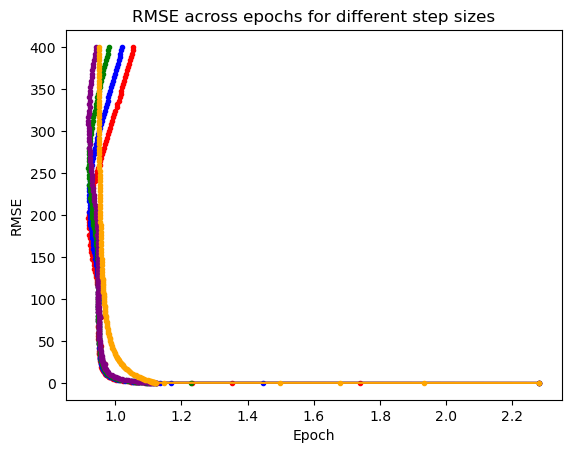

In [4]:
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
        load_train_valid_test_datasets()
MAE_per_step, RMSE_per_step, epochs_per_step = find_best_step(n_users, n_items, train_tuple, valid_tuple)
graph(RMSE_per_step, epochs_per_step, "RMSE", "RMSE across epochs for different step sizes")

[[1.9855497088301193, 1.5199184206439056, 1.0572347917651008, 1.0017658613374334, 0.9420540518813408, 0.9223657212129195, 0.9210756625666767, 0.9082248835627527, 0.9081560464257984, 0.908074523717971, 0.8873752208595677, 0.8868875849994277, 0.8905574376348769, 0.8653909697596057, 0.8833191648277013, 0.8702993536515903, 0.8742432056887238, 0.8592451417920252, 0.8402410428235637, 0.849689135867658, 0.8397274637072001, 0.8348147806361701, 0.8120635419176163, 0.8063110673580464, 0.8088487204632523, 0.7974354028283251, 0.7924572000121566, 0.8078906090122034, 0.7913477447718388, 0.7871493072074379, 0.7899269232802513, 0.7843545250518181, 0.7776879674095472, 0.7789044969476879, 0.7713612465879174, 0.7743502101326437, 0.7679464878212301, 0.7674394917373747, 0.7599977836469431, 0.7645907393430346, 0.7596846986965634, 0.7576889943592882, 0.7580639166269689, 0.7553893814192364, 0.7550400789036442, 0.7571110959897356, 0.7792242941798697, 0.7594663497333715, 0.764258347513414, 0.7583066378068472, 0

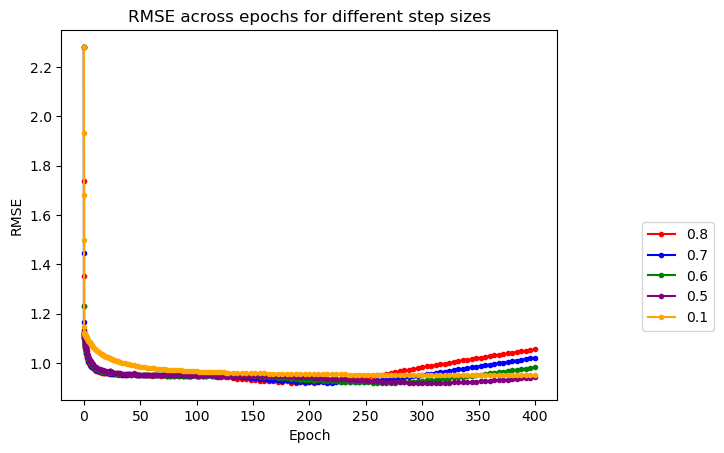

In [8]:
print(MAE_per_step)
graph(epochs_per_step, RMSE_per_step, "RMSE", "RMSE across epochs for different step sizes")
#, RMSE_per_step, epochs_per_step

In [14]:
for i, RMSE in enumerate(RMSE_per_step):
    print("step:", steps[i])
    print("min RMSE:", min(RMSE))
    print("index:", RMSE.index(min(RMSE)))
    print("epoch:", epochs_per_step[i][RMSE.index(min(RMSE))])
    print("-------")

step: 0.8
min RMSE: 0.9190946594411507
index: 120
epoch: 196.0
-------
step: 0.7
min RMSE: 0.9194073522024324
index: 126
epoch: 220.0
-------
step: 0.6
min RMSE: 0.9190878985373906
index: 135
epoch: 256.0
-------
step: 0.5
min RMSE: 0.9190420135065864
index: 149
epoch: 312.0
-------
step: 0.1
min RMSE: 0.9495459048714832
index: 171
epoch: 399.98571428571563
-------
